# $\zeta$-Space of Lorenz synchronization
------------------------------------------------
This notebook is an example of the $\zeta$-space application over a synchronization Lorenz system. The implementation is presented [here](https://github.com/rsautter/Zeta-Space). The lorentz system is given by:

$$
{dx \over dt} = \sigma(y-x)
$$
$$
{dy \over dt} = x(\rho-z) -y
$$
$$
{dz \over dt} = xy -\beta z
$$

In [1]:
!pip install MFDFA
!pip install git+https://github.com/rsautter/Zeta-Space/@qq-Approach

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rsautter/Zeta-Space/ (to revision qq-Approach) to /tmp/pip-req-build-vooiadtj
  Running command git clone -q https://github.com/rsautter/Zeta-Space/ /tmp/pip-req-build-vooiadtj
  Running command git checkout -b qq-Approach --track origin/qq-Approach
  Switched to a new branch 'qq-Approach'
  Branch 'qq-Approach' set up to track remote branch 'qq-Approach' from 'origin'.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for zetaSpace: filename=zetaSpace-0.1-py3-none-any.whl size=8588 sha256=bdb46dad431b8a654afa42a971331b188666391dccd42faab8bbf5872f5708a8
  Stored in directory: /tmp/pip-ephem-wheel-cache-a4k65wlh/wheels/74/df/a6/372ef60297b3239ae6e8da4f83e1aa44fd7c76d2da0dc5

In [2]:
import zeta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. Getting Data

In [3]:
!wget https://raw.githubusercontent.com/rsautter/Zeta-Space/main/examples/LorenzSynch/secondSample/SeriesEx2_21.dat 

--2022-09-25 14:26:32--  https://raw.githubusercontent.com/rsautter/Zeta-Space/main/examples/LorenzSynch/secondSample/SeriesEx2_21.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1443571 (1.4M) [text/plain]
Saving to: ‘SeriesEx2_21.dat’

SeriesEx2_21.dat    100%[===================>]   1.38M  --.-KB/s    in 0.07s   

2022-09-25 14:26:32 (19.6 MB/s) - ‘SeriesEx2_21.dat’ saved [1443571/1443571]



In [4]:
data = pd.read_csv("SeriesEx2_21.dat",sep='\t',header=None)
data = data.rename(columns={0: "Time", 1: "Signal"})

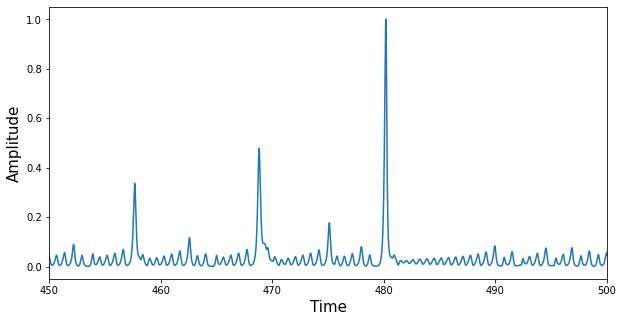

In [5]:
plt.figure(figsize=(10,5))
plt.plot(data["Time"],data["Signal"])
plt.xlim(np.min(data["Time"]),np.max(data["Time"]))
plt.xlabel("Time",fontsize=15)
plt.ylabel("Amplitude",fontsize=15)
plt.show()

# 2. Finding the singularity spectrum and PSD

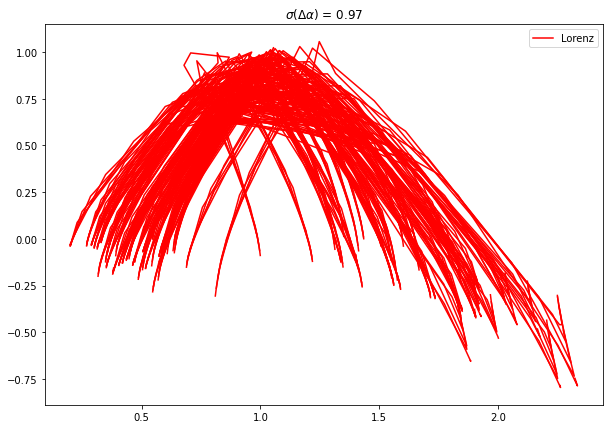

In [6]:
alphas, falphas, delta  = zeta.autoMFDFA(data["Signal"].values)

plt.figure(figsize=(10,7))
for i in range(len(alphas)):
  if i==0:
    plt.plot(alphas[i],falphas[i],color='r',label=r"Lorenz")
  else:
    plt.plot(alphas[i],falphas[i],color='r')
plt.title(r"$\sigma (\Delta \alpha)$ = "+str(np.round(delta,2)))
plt.legend()
plt.show()

# 3. Zeta Values

In [7]:
zeta.zetaSpace(data["Signal"].values)

{'GQQ': 0.6687269986310562, 'LDA': 0.9720867105329257}

# 4. Comparing series

In [8]:
!wget https://raw.githubusercontent.com/rsautter/Zeta-Space/main/examples/LorenzSynch/secondSample/SeriesEx2_23.dat 
!wget https://raw.githubusercontent.com/rsautter/Zeta-Space/main/examples/LorenzSynch/secondSample/SeriesEx2_24.dat 
!wget https://raw.githubusercontent.com/rsautter/Zeta-Space/main/examples/LorenzSynch/secondSample/SeriesEx2_25.dat 
!wget https://raw.githubusercontent.com/rsautter/Zeta-Space/main/examples/LorenzSynch/secondSample/SeriesEx2_43.dat
!wget https://raw.githubusercontent.com/rsautter/Zeta-Space/main/examples/LorenzSynch/secondSample/SeriesEx2_47.dat

--2022-09-25 15:13:35--  https://raw.githubusercontent.com/rsautter/Zeta-Space/main/examples/LorenzSynch/secondSample/SeriesEx2_23.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1428090 (1.4M) [text/plain]
Saving to: ‘SeriesEx2_23.dat’

SeriesEx2_23.dat    100%[===================>]   1.36M  --.-KB/s    in 0.07s   

2022-09-25 15:13:36 (19.8 MB/s) - ‘SeriesEx2_23.dat’ saved [1428090/1428090]

--2022-09-25 15:13:36--  https://raw.githubusercontent.com/rsautter/Zeta-Space/main/examples/LorenzSynch/secondSample/SeriesEx2_24.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP re

In [9]:
s21 = pd.read_csv("SeriesEx2_21.dat",sep='\t',header=None)
s23 = pd.read_csv("SeriesEx2_23.dat",sep='\t',header=None)
s24 = pd.read_csv("SeriesEx2_24.dat",sep='\t',header=None)
s25 = pd.read_csv("SeriesEx2_25.dat",sep='\t',header=None)
s43 = pd.read_csv("SeriesEx2_43.dat",sep='\t',header=None)
s47 = pd.read_csv("SeriesEx2_47.dat",sep='\t',header=None)

s21 = s21.rename(columns={0: "Time", 1: "Signal"})
s23 = s23.rename(columns={0: "Time", 1: "Signal"})
s24 = s24.rename(columns={0: "Time", 1: "Signal"})
s25 = s25.rename(columns={0: "Time", 1: "Signal"})
s43 = s43.rename(columns={0: "Time", 1: "Signal"})
s47 = s47.rename(columns={0: "Time", 1: "Signal"})

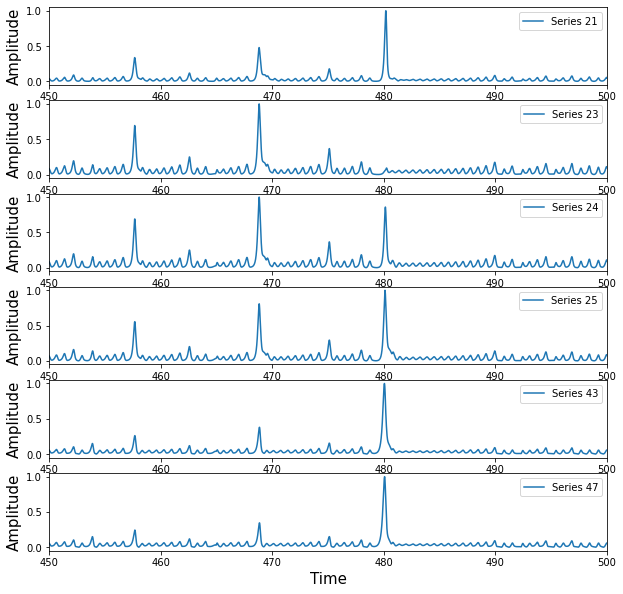

In [10]:
plt.figure(figsize=(10,10))

plt.subplot(6,1,1)
plt.plot(s21["Time"],s21["Signal"],label="Series 21")
plt.xlim(np.min(s21["Time"]),np.max(s21["Time"]))
plt.ylabel("Amplitude",fontsize=15)
plt.legend()

plt.subplot(6,1,2)
plt.plot(s23["Time"],s23["Signal"],label="Series 23")
plt.xlim(np.min(s23["Time"]),np.max(s23["Time"]))
plt.ylabel("Amplitude",fontsize=15)
plt.legend()

plt.subplot(6,1,3)
plt.plot(s24["Time"],s24["Signal"],label="Series 24")
plt.xlim(np.min(s24["Time"]),np.max(s24["Time"]))
plt.ylabel("Amplitude",fontsize=15)
plt.legend()

plt.subplot(6,1,4)
plt.plot(s25["Time"],s25["Signal"],label="Series 25")
plt.xlim(np.min(s25["Time"]),np.max(s25["Time"]))
plt.ylabel("Amplitude",fontsize=15)
plt.legend()

plt.subplot(6,1,5)
plt.plot(s43["Time"],s43["Signal"],label="Series 43")
plt.xlim(np.min(s43["Time"]),np.max(s43["Time"]))
plt.ylabel("Amplitude",fontsize=15)
plt.legend()

plt.subplot(6,1,6)
plt.plot(s47["Time"],s47["Signal"],label="Series 47")
plt.xlim(np.min(s47["Time"]),np.max(s47["Time"]))
plt.ylabel("Amplitude",fontsize=15)
plt.legend()

plt.xlabel("Time",fontsize=15)
plt.ylabel("Amplitude",fontsize=15)
plt.show()

In [11]:
zeta.zetaSpace(s47["Signal"].values)

{'GQQ': 0.6568769031908874, 'LDA': 0.8727946962022571}

In [ ]:
s21Z = zeta.zetaSpace(s21["Signal"].values,nsamples=10)
s23Z = zeta.zetaSpace(s23["Signal"].values,nsamples=10)
s24Z = zeta.zetaSpace(s24["Signal"].values,nsamples=10)
s25Z = zeta.zetaSpace(s25["Signal"].values,nsamples=10)
s43Z = zeta.zetaSpace(s43["Signal"].values,nsamples=10)
s47Z = zeta.zetaSpace(s47["Signal"].values,nsamples=10)

In [ ]:
s21Z["Strength"] = 21
s23Z["Strength"] = 23
s24Z["Strength"] = 24
s25Z["Strength"] = 25
s43Z["Strength"] = 43
s47Z["Strength"] = 47
df = pd.DataFrame([s21Z,s23Z,s24Z,s25Z,s43Z,s47Z])
df.to_csv("zLorentz.csv")

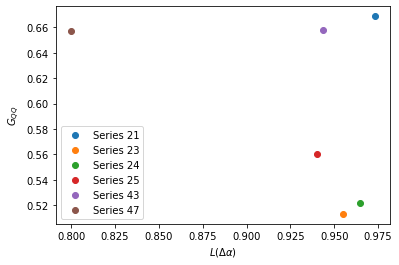

In [15]:
plt.figure()
plt.scatter(s21Z["LDA"],s21Z["GQQ"],label=r"Series 21")
plt.scatter(s23Z["LDA"],s23Z["GQQ"],label=r"Series 23")
plt.scatter(s24Z["LDA"],s24Z["GQQ"],label=r"Series 24")
plt.scatter(s25Z["LDA"],s25Z["GQQ"],label=r"Series 25")
plt.scatter(s43Z["LDA"],s43Z["GQQ"],label=r"Series 43")
plt.scatter(s47Z["LDA"],s47Z["GQQ"],label=r"Series 47")
plt.legend()
plt.xlabel(r"$L( \Delta \alpha) $")
plt.ylabel(r"$G_{QQ}$")
plt.show()